In [1]:
import plotly.express as px
from mainnet_launch.constants import *
from mainnet_launch.pages.rebalance_events.rebalance_events import fetch_rebalance_events_df
from mainnet_launch.database.schema.postgres_operations import get_full_table_as_df
from mainnet_launch.database.schema.full import *
import plotly.io as pio

pio.templates.default = None

autopool = AUTO_DOLA
df = fetch_rebalance_events_df(autopool)
# you need to rename the spot swap cost values

# px.scatter(df, x='swap_cost_in_bps_of_value_out', y='safe_slippage_bps', color='long_move_name')

2025-06-09 13:17:17.613 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2025-06-09 13:17:17.615 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-09 13:17:17.696 
  command:

    streamlit run /Users/pb/Library/Caches/pypoetry/virtualenvs/mainnet-launch-FtycU18g-py3.10/lib/python3.10/site-packages/ipykernel_launcher.py [ARGUMENTS]
2025-06-09 13:17:17.696 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-09 13:17:17.697 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-09 13:17:17.697 No runtime found, using MemoryCacheStorageManager
2025-06-09 13:17:18.202 Thread 'Thread-4': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-09 13:17:18.203 Thread 'Thread-4

In [2]:
import streamlit as st
import plotly.express as px

# map move_name to numeric codes so z-axis can be categorical
df["move_code"] = df["move_name"].astype("category").cat.codes
cats = list(df["move_name"].astype("category").cat.categories)

fig = px.scatter_3d(
    df,
    x="swap_cost_in_bps_of_value_out",
    y="spot_value_out",
    z="move_code",
    hover_data=["move_name"],
    title="3d swap vs spot by move",
)

fig.update_layout(
    scene=dict(
        xaxis_title="swap_cost_in_bps_of_value_out",
        yaxis_title="spot_value_out",
        zaxis=dict(title="move_name", tickmode="array", tickvals=list(range(len(cats))), ticktext=cats),
    )
)

# st.plotly_chart(fig, use_container_width=True)
fig.show()

In [ ]:
import streamlit as st
import plotly.express as px

# encode move_name as codes for z axis
df["move_code"] = df["move_name"].astype("category").cat.codes
cats = df["move_name"].astype("category").cat.categories.tolist()

fig = px.scatter(
    df,
    x="swap_cost_in_bps_of_value_out",
    y="spot_value_out",
    color="move_name",
    hover_data=["move_name"],
    title="3d swap vs spot by move",
)

# force marker size
fig.update_traces(marker=dict(size=8))

fig.update_layout(
    scene=dict(
        xaxis_title="swap_cost_in_bps_of_value_out",
        yaxis_title="spot_value_out",
        zaxis=dict(title="move_name", tickmode="array", tickvals=list(range(len(cats))), ticktext=cats),
    )
)

fig.update_layout(width=1200, height=800, margin=dict(l=0, r=0, t=30, b=0))

: 

In [ ]:
import streamlit as st
import plotly.express as px

# encode move_name as codes for z axis
df["move_code"] = df["move_name"].astype("category").cat.codes
cats = df["move_name"].astype("category").cat.categories.tolist()

fig = px.scatter(
    df,
    x=df.index,
    y="swap_cost_in_bps_of_value_out",
    # z='',
    color="move_name",
    hover_data=["move_name"],
    size="spot_value_out",
    title="3d swap vs spot by move",
)

fig

# # force marker size
# # fig.update_traces(marker=dict(size=8))

# # fig.update_layout(
# #     scene=dict(
# #         xaxis_title='swap_cost_in_bps_of_value_out',
# #         yaxis_title='spot_value_out',
# #         zaxis=dict(
# #             title='move_name',
# #             tickmode='array',
# #             tickvals=list(range(len(cats))),
# #             ticktext=cats
# #         )
# #     )
# # )

# fig.update_layout(
#     width=1200,
#     height=800,
#     margin=dict(l=0, r=0, t=30, b=0)
# )

: 

In [ ]:
df.columns

: 

In [ ]:

df[


    [
        "tx_hash",
        "destination_out",
        "destination_in",
        "safe_value_out",
        "safe_value_in",
        "spot_value_in",
        "spot_value_out",
        "spot_value_in_solver_change",
        "block",
        "move_name",
        "destination_in_symbol",
        "destination_out_symbol",
        "destination_in_tokens",
        "destination_out_tokens",
        "tokens_move_name",
        "expected_to_be_lossless",
        "spot_swap_cost",
        "spot_slippage_bps",
        "safe_swap_cost",
        "safe_slippage_bps",
        "swap_cost_in_bps_of_value_out",
        "swap_cost_in_bps_of_NAV",
        "spot_swap_cost_less_value_in_solver",
        "spot_slippage_bps_less_value_in_solver"
    ]
]

df["spot_swap_cost_less_value_in_solver"] = (
    (df["spot_value_out"] - df["spot_value_in"]) - df["spot_value_in_solver_change"]
)

df["spot_swap_cost_less_value_in_solver"] = df["spot_swap_cost_less_value_in_solver"].where(
    ~df["expected_to_be_lossless"], df["spot_value_in_solver_change"]
)

df['spot_slippage_bps_less_value_in_solver'] = (
    df['spot_swap_cost_less_value_in_solver'] / df['spot_value_out']
) * 10000


grp = df.groupby('move_name').agg(
    spot_value_out_sum=('spot_value_out', 'sum'),
    swap_cost_sum=('spot_swap_cost', 'sum'),
    spot_swap_cost_less_value_in_solver_sum=('spot_swap_cost_less_value_in_solver', 'sum'),
)

# basis-points metrics
grp['cost_bps']     = grp['swap_cost_sum']   / grp['spot_value_out_sum'] * 10_000
grp['swap_cost_backout_value_left_in_solver'] =grp['spot_swap_cost_less_value_in_solver_sum'] / grp['spot_value_out_sum'] * 10_000
grp[['spot_value_out_sum', 'spot_swap_cost_less_value_in_solver_sum', 'swap_cost_backout_value_left_in_solver']].round(2)

,spot_value_out_sum,spot_swap_cost_less_value_in_solver_sum,swap_cost_backout_value_left_in_solver
move_name,,,
autoDOLA -> DOLA-sUSDS,60877.19,33.66,5.53
autoDOLA -> DOLA-sUSDe,185000.00,191.34,10.34
autoDOLA -> reusdsdola,1141827.09,346.37,3.03
autoDOLA -> sDOLA,1623749.47,243.56,1.50
autoDOLA -> savedola,536394.16,51.69,0.96
sDOLA -> savedola,100000.02,68.70,6.87


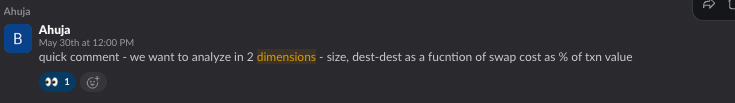

,spot_value_out_sum,swap_cost_sum,spot_swap_cost_less_value_in_solver_sum,cost_bps,net_cost_bps
move_name,,,,,
autoDOLA -> DOLA-sUSDS,6.087719e+04,22.770268,33.657371,3.740361,-1.788371
autoDOLA -> DOLA-sUSDe,1.850000e+05,-293.064625,191.343880,-15.841331,-26.184244
autoDOLA -> reusdsdola,1.141827e+06,517.646950,346.372887,4.533497,1.500000
autoDOLA -> sDOLA,1.623749e+06,243.562420,1524.895630,1.500000,-7.891200
autoDOLA -> savedola,5.363942e+05,132.151673,51.692549,2.463705,1.500000
sDOLA -> savedola,1.000000e+05,68.704344,68.704344,6.870433,0.000000


: 

In [ ]:
df['datetime'] = df.index

: 

In [ ]:
px.scatter(df, x='spot_slippage_bps', y='safe_slippage_bps', hover_data='datetime', color='move_name')


: 

In [ ]:
px.scatter(df, x=df.index, y='move_name', hover_data=df[['swap_cost_in_bps_of_value_out', 'spot_value_out']])

: 

In [ ]:
df[df["swap_cost_in_bps_of_NAV"] > 12].T

: 

In [ ]:
df[df["tokens_move_name"] == "('USDC',) -> ('USDC',)"]["move_name"].value_counts().index

: 

In [ ]:
df[df["tokens_move_name"] == "('USDC',) -> ('USDC',)"]["move_name"].value_counts().index

: 

In [ ]:
df["long_move_name"] = df["move_name"] + "   " + df["tokens_move_name"]
df["long_move_name"].value_counts()

: 

In [ ]:
# spot_value_in_solver_change is not correct in BASE_USD

: 

In [ ]:
(df["spot_value_in_solver_change"] > 0).value_counts(normalize=True)

: 

In [ ]:
px.histogram(df["spot_value_in_solver_change"])

: 

In [ ]:
df["long_move_name"] = df["move_name"] + "   " + df["tokens_move_name"]
cond = df["move_name"].isin(["autoDOLA -> sDOLA", "baseUSD -> fUSDC", "baseUSD -> smUSDC", "baseUSD -> mwUSDC"])
cond = cond | (df["tokens_move_name"] == "('USDC',) -> ('USDC',)")
df["adjusted_spot_swap_cost"] = df["spot_value_in_solver_change"].where(
    cond, df["spot_swap_cost"] - df["spot_value_in_solver_change"]
)
df["adjusted_spot_swap_cost_in_bps_of_value_out"] = 10_000 * df["adjusted_spot_swap_cost"] / df["spot_value_out"]
df["adjusted_spot_swap_cost_in_bps_of_NAV"] = 10_000 * df["adjusted_spot_swap_cost"] / df["total_nav"]

: 

In [ ]:
px.scatter(df, x="adjusted_spot_swap_cost_in_bps_of_value_out", y="spot_value_out", color="long_move_name")

: 

In [ ]:
expensive_rebalances = df[
    df["adjusted_spot_swap_cost_in_bps_of_value_out"]
    > df["adjusted_spot_swap_cost_in_bps_of_value_out"].describe()["75%"]
]
expensive_rebalances.groupby("long_move_name")["adjusted_spot_swap_cost_in_bps_of_value_out"].describe().round(2
# 3bps is the 75th percentile of swap cost on baseUSD

: 

In [ ]:
all_time_performance = df.groupby("long_move_name")[["adjusted_spot_swap_cost", "spot_value_out"]].sum()

all_time_performance["average_bps"] = (
    10_000 * all_time_performance["adjusted_spot_swap_cost"] / all_time_performance["spot_value_out"]
)

all_time_performance["spot_value_out_thousands"] = all_time_performance["spot_value_out"] / 1_000
all_time_performance[["spot_value_out_thousands", "adjusted_spot_swap_cost", "average_bps"]].round()

: 

: 

In [ ]:
df.groupby("long_move_name")["adjusted_spot_swap_cost"].sum().sort_values(ascending=False)

: 

In [ ]:
df[df["move_name"] == "autoDOLA -> sDOLA"]["spot_swap_cost"]

: 

In [ ]:
(df["move_name"] == "autoDOLA -> sDOLA").value_counts()

: 

In [ ]:
df.groupby("long_move_name")["swap_cost_in_bps_of_value_out"].describe().T.round(2)

: 

: 

In [ ]:
df.groupby("long_move_name")["safe_slippage_bps"].describe().T.round(2)

: 

In [ ]:
df.co

: 

In [ ]:
df[df["tx_hash"] == "0x272e39d795a4a38e6cc22ec9e54deb92fa068c83304d5a6e7054c9d68702d21d"].T
# expected to have 0 slippage

: 

In [ ]:
from multicall import Call
from mainnet_launch.data_fetching.get_state_by_block import *

: 

In [ ]:
AUTO_USD_ROOT_PRICE_ORACLE = "0xdB8747a396D75D576Dc7a10bb6c8F02F4a3C20f1"
DOLA = "0x865377367054516e17014CcdED1e7d814EDC9ce4"
sDOLA = "0xb45ad160634c528Cc3D2926d9807104FA3157305"

sDOLA_exchange_rate = Call(
    sDOLA,
    ["convertToAssets(uint256)(uint256)", int(1e18)],
    [("sDOLA_exchange_rate", safe_normalize_with_bool_success)],
)

# drop the parentheses on DOLA – it’s just a string here, not a function
sDOLA_spot_price_call = Call(
    AUTO_USD_ROOT_PRICE_ORACLE,
    ["getSpotPriceInQuote(address,address,address)(uint256)", sDOLA, sDOLA, DOLA],
    [("sDOLA_spot_price", safe_normalize_with_bool_success)],
)

autoDOLA_solver = "0x2795B6a09df08891EF21f7153f4799cFBe3Ae6b6"

dola_autopool_bal_call = Call(
    DOLA,
    ["balanceOf(address)(uint256)", AUTO_DOLA.autopool_eth_addr],
    [("autopool_bal", safe_normalize_with_bool_success)],
)

dola_solver_bal_call = Call(
    DOLA,
    ["balanceOf(address)(uint256)", autoDOLA_solver],
    [("solver_bal", safe_normalize_with_bool_success)],
)


before = get_state_by_one_block(
    [sDOLA_exchange_rate, sDOLA_spot_price_call, dola_autopool_bal_call, dola_solver_bal_call],
    22621780 - 1,  # block_number - 1
    ETH_CHAIN,
)

after = get_state_by_one_block(
    [sDOLA_exchange_rate, sDOLA_spot_price_call, dola_autopool_bal_call, dola_solver_bal_call],
    22621780,  # block_number - 1
    ETH_CHAIN,
)
{"before": before, "after": after}

: 

In [ ]:
blocks = build_blocks_to_use(ETH_CHAIN)

sDOLA_price_df = get_raw_state_by_blocks(
    [sDOLA_exchange_rate, sDOLA_spot_price_call], blocks, ETH_CHAIN, include_block_number=True
)

px.line(sDOLA_price_df)

: 

In [ ]:
blocks_to_check = [b for b in range(22584692, 22640079, 500)]
sDOLA_price_df = get_raw_state_by_blocks([sDOLA_exchange_rate, sDOLA_spot_price_call], blocks_to_check, ETH_CHAIN)

px.line(sDOLA_price_df)

: 

In [ ]:
px.line(
    10_000
    * (sDOLA_price_df["sDOLA_spot_price"] - sDOLA_price_df["sDOLA_exchange_rate"])
    / sDOLA_price_df["sDOLA_exchange_rate"],
    title="sDOLA exchange rate vs spot price bps difference",
)

: 

In [ ]:
sDOLA_price_df[sDOLA_price_df["sDOLA_spot_price"] > 0]

: 

In [ ]:
auto_usd_root_price_oracle = "0xdB8747a396D75D576Dc7a10bb6c8F02F4a3C20f1"
dola = "0x865377367054516e17014CcdED1e7d814EDC9ce4"
sdola = "0xb45ad160634c528Cc3D2926d9807104FA3157305"

sdola_exchange_rate = Call(
    sdola,
    ["convertToAssets(uint256)(uint256)", int(1e18)],
    [("sdola_exchange_rate", safe_normalize_with_bool_success)],
)

sdola_spot_price_call = Call(
    auto_usd_root_price_oracle,
    ["getSpotPriceInQuote(address,address,address)(uint256)", sdola, sdola, dola],
    [("sdola_spot_price", safe_normalize_with_bool_success)],
)

autoDOLA_solver = "0x2795B6a09df08891EF21f7153f4799cFBe3Ae6b6"

dola_autopool_bal_call = Call(
    dola,
    ["balanceOf(address)(uint256)", AUTO_DOLA.autopool_eth_addr],
    [("dola_autopool_bal", safe_normalize_with_bool_success)],
)

dola_solver_bal_call = Call(
    dola,
    ["balanceOf(address)(uint256)", autoDOLA_solver],
    [("dola_solver_bal", safe_normalize_with_bool_success)],
)

sdola_autopool_bal_call = Call(
    sdola,
    ["balanceOf(address)(uint256)", AUTO_DOLA.autopool_eth_addr],
    [("sdola_autopool_bal", safe_normalize_with_bool_success)],
)

sdola_solver_bal_call = Call(
    sdola,
    ["balanceOf(address)(uint256)", autoDOLA_solver],
    [("sdola_solver_bal", safe_normalize_with_bool_success)],
)

block_number = 22621780

before = get_state_by_one_block(
    [
        sdola_exchange_rate,
        sdola_spot_price_call,
        dola_autopool_bal_call,
        dola_solver_bal_call,
        sdola_autopool_bal_call,
        sdola_solver_bal_call,
    ],
    block_number - 1,
    ETH_CHAIN,
)

after = get_state_by_one_block(
    [
        sdola_exchange_rate,
        sdola_spot_price_call,
        dola_autopool_bal_call,
        dola_solver_bal_call,
        sdola_autopool_bal_call,
        sdola_solver_bal_call,
    ],
    block_number,
    ETH_CHAIN,
)

{"before": before, "after": after}

: 

In [ ]:

        for (pool_address, token_address) in zip(pool_token_addresses["pool"], pool_token_addresses["token_address"])

: 

In [ ]:
df[["spot_value_in_solver_change", "spot_swap_cost"]].describe()

: 

In [ ]:
df["spot_swap_cost_less_solver"] = df["spot_swap_cost"] - df["spot_value_in_solver_change"]

px.scatter(df, x="spot_swap_cost", y="spot_swap_cost_less_solver")

: 

In [ ]:
px.histogram(df["spot_swap_cost_less_solver"])

: 

: 